,T(min),TI2,TI3,TI4,TI5,TI10,TI11,TI12,PD
0,0,82.5,80.8,73.7,65.7,18.7,18.9,61.8,23
1,4,83.3,81.6,76.8,63.9,18.8,19.2,61.9,23
2,8,83.7,81.6,76.8,62.8,18.7,19.3,71.8,23
3,12,83.9,81.4,76.7,62.4,18.8,19.4,61.9,23
4,16,84.2,81.7,73.6,62.4,18.8,19.4,61.9,23
5,20,84.5,82.2,76.5,62.4,18.7,19.5,61.9,23


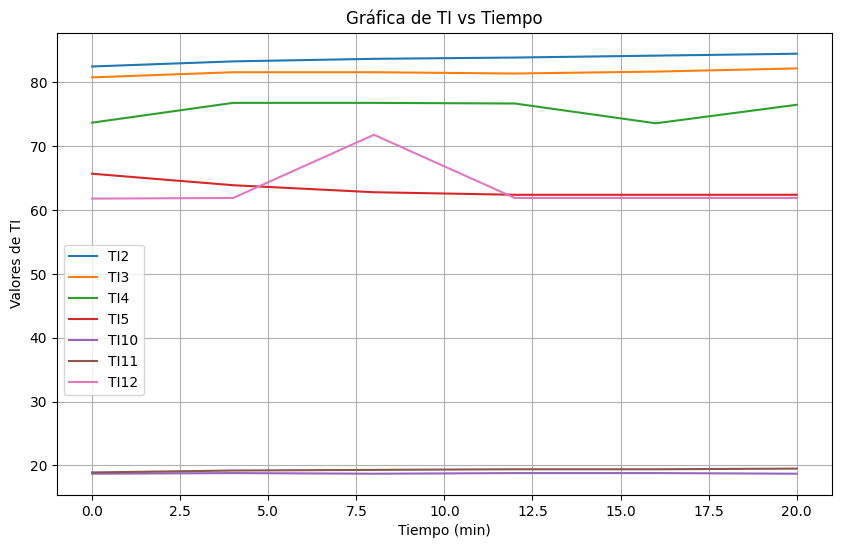

,Fase,Composicion,IR
0,Destilado,0.992920,1.3287
1,Residuo,0.157522,1.3759


In [319]:
import pandas as pd 
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
#indices de refraccion, ND
IR_prop = 1.3848
IR_met = 1.3283
IR_destilado = 1.3287
IR_Residuo = 1.3759
#composicion destilado
xD = (IR_destilado - IR_prop) / (IR_met - IR_prop)
xW = (IR_Residuo - IR_prop) / (IR_met - IR_prop)
#tabla de temperaturas
Tabla= {
    'T(min)' : [0, 4, 8, 12, 16, 20],
    'TI2' : [82.5, 83.3, 83.7, 83.9, 84.2, 84.5],
    'TI3' : [80.8, 81.6, 81.6, 81.4, 81.7, 82.2],
    'TI4' : [73.7, 76.8, 76.8, 76.7, 73.6, 76.5],
    'TI5' : [65.7, 63.9, 62.8, 62.4, 62.4, 62.4],
    'TI10' : [18.7, 18.8, 18.7, 18.8, 18.8, 18.7],
    'TI11' : [18.9, 19.2, 19.3, 19.4, 19.4,19.5],
    'TI12' : [61.8, 61.9, 71.8, 61.9, 61.9, 61.9],
    'PD' : [23, 23, 23, 23, 23, 23], #mmHg
}
df = pd.DataFrame(Tabla)
x1 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
y1 = [0, 0.146, 0.268, 0.371, 0.459, 0.534, 0.599, 0.656, 0.704, 0.747, 0.785, 0.818, 0.848, 0.875, 0.899, 0.92, 0.939, 0.957, 0.972, 0.987, 1]
# Mostrar el DataFrame
display(df)
tabla_composicion = {
    'Fase' : ['Destilado', 'Residuo'],
    'Composicion' : [xD, xW],
    'IR' : [IR_destilado, IR_Residuo]
}

# Graficar todas las columnas excepto la última ("PD")
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # Omitir la primera columna y la última columna
    plt.plot(df['T(min)'], df[column], label=column)

plt.xlabel('Tiempo (min)')
plt.ylabel('Valores de TI')
plt.title('Gráfica de TI vs Tiempo')
plt.legend(loc='lower left', bbox_to_anchor=(0, 0.2))
plt.grid(True)
plt.show()
display(pd.DataFrame(tabla_composicion))

In [320]:
y1d = np.interp(xD, x1, y1)
y1r = np.interp(xW, x1, y1)
y2d = 1 - y1d
y2r = 1 - y1r
alpha12d = (y1d / xD) / (y2d / (1 - xD))  # Ajusta el cálculo según tus datos
alpha12r = (y1r / xW) / (y2r / (1 - xW))
alpha_media = np.sqrt(alpha12d * alpha12r)


,HETP McCabbe,HETP Fenske
0,0.168041,0.191229


,etapas teoricas,etapas exactas,etapas Fenske
0,6,5.891422,5.177046


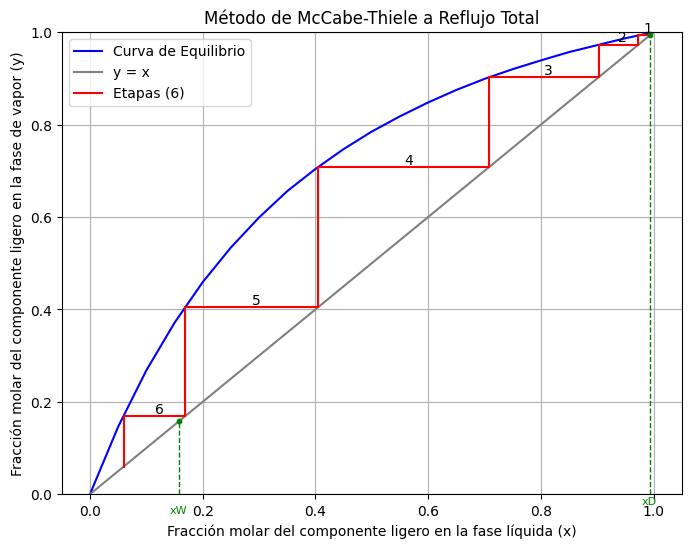

Etapa,x,y,linea
1,0.972771,0.992920,curva de equilibrio
2,0.902569,0.972771,curva de equilibrio
3,0.708497,0.902569,curva de equilibrio
4,0.405229,0.708497,curva de equilibrio
5,0.169448,0.405229,curva de equilibrio
6,0.059610,0.169448,curva de equilibrio


In [321]:

s = np.zeros((200, 2))
s[0, 0] = xD
s[0, 1] = xD  # Mover horizontalmente para encontrar el punto de equilibrio
H = 0.99
for i in range(1, 200):
    # Movimiento vertical hacia abajo
    s[i, 1] = s[i-1, 0]  # Mover verticalmente a y = x
    if s[i, 1] <= xW:
        s[i, 0] = s[i, 1]  # En la última etapa, y = x = xW
        break
    # Movimiento horizontal a la curva de equilibrio
    s[i, 0] = np.interp(s[i, 1], y1, x1)

# Limpiar filas con ceros innecesarios
s = s[~np.all(s == 0, axis=1)]
s_rows = s.shape[0]

# Crear un DataFrame para almacenar las etapas
data = {
    'Etapa': [],
    'x': [],
    'y': [],
    'linea': []
}

S = np.zeros((s_rows * 2, 2))
for i in range(0, s_rows):
    S[i * 2, 0] = s[i, 0]  # Coordenada x de la etapa actual
    S[i * 2, 1] = s[i, 1]  # Coordenada y de la etapa actual
    
    if i < s_rows - 1:
        S[i * 2 + 1, 0] = s[i, 0]  # x permanece igual para el movimiento vertical
        S[i * 2 + 1, 1] = s[i + 1, 1]  # y de la siguiente etapa
    else:
        S[i * 2 + 1, 0] = s[i, 0]
        S[i * 2 + 1, 1] = s[i, 0]  # y = x para la última etapa

for i in range(1, s_rows-1):
    data['Etapa'].append(i)
    data['x'].append(s[i, 0])
    data['y'].append(s[i, 1])
    data['linea'].append('curva de equilibrio')

df = pd.DataFrame(data)

# Calcular las etapas exactas
x_ult_etapa = data['x'][-1]
x_penult = data['x'][-2]
tolerancia = 1e-5
if np.abs(x_ult_etapa - x_penult) < tolerancia:
    ultima_etapa_exacta = 0
    Nt_etapas = len(data['Etapa'])  
else:
    ultima_etapa_exacta = (xW - x_ult_etapa) / (x_penult - x_ult_etapa)
    Nt_etapas = s_rows - 3 + ultima_etapa_exacta

Etapas_frame = pd.DataFrame({
    'etapas teoricas': [len(data['Etapa'])],
    'etapas exactas': [Nt_etapas],
    'etapas Fenske': (np.log10((xD/xW)* ((1-xW)/(1-xD))))/(np.log10(alpha_media))
})
HETP_frame = pd.DataFrame({
    'HETP McCabbe': [H / Nt_etapas],
    'HETP Fenske': [H / Etapas_frame['etapas Fenske'][0]]
})
display(HETP_frame)
# Guardar resultados en la lista Z
display(Etapas_frame)

# Graficar el diagrama de McCabe-Thiele
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Curva de Equilibrio', color='blue')
plt.plot([0, 1], [0, 1], color='gray', label='y = x ')
plt.plot(S[:, 0], S[:, 1], color='red', label=f'Etapas ({len(data["Etapa"])})')

# Puntos xD y xW
plt.scatter([xD, xW], [xD, xW], color='green', zorder=5, s=10)

# Líneas discontinuas desde el eje x hasta los puntos
plt.plot([xD, xD], [0, xD], color='green', linestyle='--', linewidth=1)
plt.plot([xW, xW], [0, xW], color='green', linestyle='--', linewidth=1)

for i in range(len(data['Etapa'])):
    mid_x = (S[i * 2, 0] + S[i * 2 + 2, 0]) / 2
    y = S[i * 2 + 2, 1]
    plt.text(mid_x, y, f'{i+1}', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.text(xD, -0.005, 'xD', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')
plt.text(xW, -0.025, 'xW', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')

plt.ylim(0, 1)
plt.xlabel('Fracción molar del componente ligero en la fase líquida (x)')
plt.ylabel('Fracción molar del componente ligero en la fase de vapor (y)')
plt.title(f'Método de McCabe-Thiele a Reflujo Total')
plt.legend()
plt.grid(True)
plt.show()
display(df.style.hide(axis='index'))


SIN REFLUJO TOTAL, ES DECIR CON ALIMENTACION Y EN CONTINUA


,T(min),TI2,TI3,TI4,TI5,TI10,TI11,TI13,TI12,PD
0,0,85.1,82.7,78.5,62.2,18.8,19.2,64.3,61.9,23
1,4,85.3,83.4,79.5,62.4,18.9,19.2,68.7,61.9,23
2,8,85.5,83.4,79.4,67.7,18.8,19.2,68.4,61.9,23
3,12,85.8,83.5,79.4,75.8,18.8,19.3,72.7,61.9,23


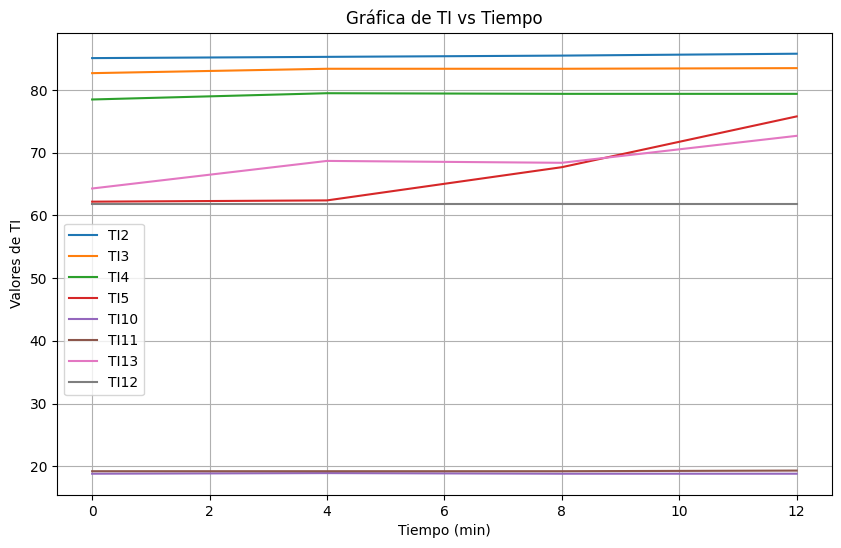

,Fase,Composicion,IR,Q ml /cdot s^{-1}
0,Destilado,0.975221,1.3297,0.061905
1,Residuo,0.072566,1.3807,0.339683
2,Alimentacion,0.130973,1.3774,0.401587


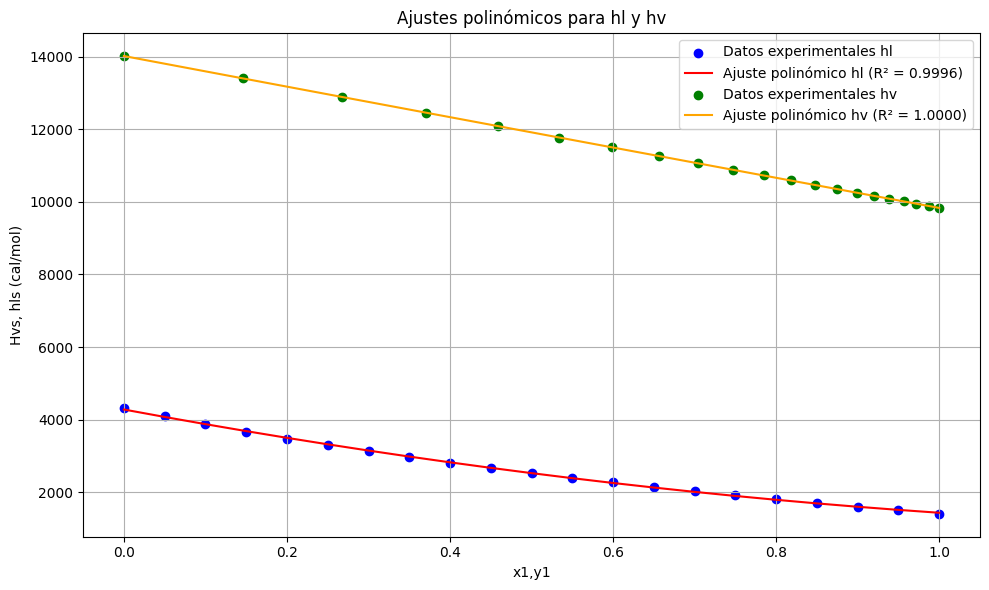

,Entalpia liquido saturado cal/mol,Entalpia Vapor saturado cal/mol,Entalpia alimentacion cal/mol
0,3752.963566,12625.521827,2751.712467


la ecuacion de la linea de operacion en la seccion de enriquecimiento es: y = 9.861471682655445 x + -1.1606175301177157
El punto de interseccion es: [0.15646756] [0.38238291]
El minimo reflujo es: [2.62416137]
R/Rmin [1.90537063]
el punto de interseccion para R con la linea q es [0.14655894] [0.28466932]
la ecuacion de la linea de operacion en la seccion de enriquecimiento es: y = 0.8333333333333335 x + 0.1625368731563418
la ecuacion de la linea de operacion en la seccion de agotamiento es: y = 2.8665439320583714 x + -0.1354483207334391


C:\Users\chris\AppData\Local\Temp\ipykernel_26572\4079656822.py:146: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  xlose = fsolve(qinterc, xinit,**options)


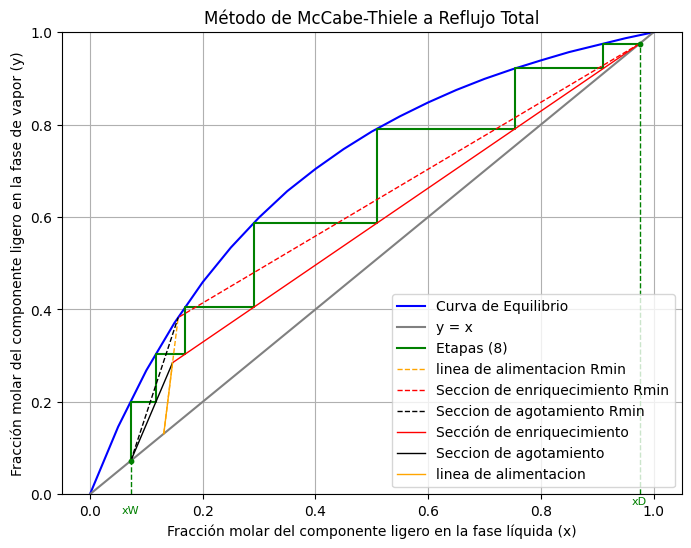

In [322]:
import pandas as pd 
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#indices de refraccion, ND
IR_prop = 1.3848
IR_met = 1.3283
IR_destilado = 1.3297
IR_Residuo = 1.3807
IR_alimentacion = 1.3774
VD = 39 #mL
VB = 214 #mL
TD = 630 # s 
TB = 630 # s
QD= VD / TD # mL/s
QB= VB / TB # mL/s
QF = QD + QB
Tref = 0
Tiempo_dest = 4 #s
Tiempo_ref = 20 #s
R= Tiempo_ref / Tiempo_dest
#composicion destilado
xD = (IR_destilado - IR_prop) / (IR_met - IR_prop)
xW = (IR_Residuo - IR_prop) / (IR_met - IR_prop)
xF = (IR_alimentacion - IR_prop) / (IR_met - IR_prop)
yF = np.interp(xF, x1, y1)
#tabla de temperaturas
Tabla= {
    'T(min)' : [0, 4, 8, 12],
    'TI2' : [85.1, 85.3, 85.5,85.8],
    'TI3' : [82.7, 83.4, 83.4, 83.5],
    'TI4' : [78.5, 79.5, 79.4, 79.4],
    'TI5' : [62.2, 62.4, 67.7, 75.8],
    'TI10' : [18.8, 18.9, 18.8, 18.8],
    'TI11' : [19.2, 19.2, 19.2, 19.3],
    'TI13' : [64.3, 68.7, 68.4, 72.7],
    'TI12' : [61.9, 61.9, 61.9, 61.9],
    'PD' : [23, 23, 23, 23], #mmHg
}
Tf = Tabla['TI13'][-1]
cp_prop = 18.1953+0.00505*Tf
cp_met = 31.1753+0.1318*Tf
df = pd.DataFrame(Tabla)
x1 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
y1 = [0, 0.146, 0.268, 0.371, 0.459, 0.534, 0.599, 0.656, 0.704, 0.747, 0.785, 0.818, 0.848, 0.875, 0.899, 0.92, 0.939, 0.957, 0.972, 0.987, 1]

# Mostrar el DataFrame
display(df)
tabla_composicion = {
    'Fase' : ['Destilado', 'Residuo', 'Alimentacion'],
    'Composicion' : [xD, xW, xF],
    'IR' : [IR_destilado, IR_Residuo, IR_alimentacion],
    'Q ml /cdot s^{-1}' : [QD, QB, QF]
}

# Graficar todas las columnas excepto la última ("PD")
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # Omitir la primera columna y la última columna
    plt.plot(df['T(min)'], df[column], label=column)

plt.xlabel('Tiempo (min)')
plt.ylabel('Valores de TI')
plt.title('Gráfica de TI vs Tiempo')
plt.legend(loc='lower left', bbox_to_anchor=(0, 0.2))
plt.grid(True)
plt.show()
display(pd.DataFrame(tabla_composicion))
y1d = np.interp(xD, x1, y1)
y1r = np.interp(xW, x1, y1)
y2d = 1 - y1d
y2r = 1 - y1r
alpha12d = (y1d / xD) / (y2d / (1 - xD))  # Ajusta el cálculo según tus datos
alpha12r = (y1r / xW) / (y2r / (1 - xW))
alpha_media = np.sqrt(alpha12d * alpha12r)


hl = [4316.1, 4084.3, 3867.7, 3665.1, 3474.3, 3294.7, 3124.6, 2963.3, 2810.3, 2664.3, 2525, 2391.7, 2263.9, 
    2141.4, 2023.6, 1910.3, 1800.9, 1695.6, 1593.7, 1495.1, 1399.8]
hv = [14033.1, 13406.7, 12887.7, 12453.3, 12086.3, 11773.4, 11504.7, 11272.2, 11069.3, 10891.5, 10734.7, 
    10595.6, 10471.7, 10360.5, 10260.7, 10170.3, 10088.6, 10013.7, 9945.8, 9883.3, 9825.8]

# Ajuste polinómico de grado 2 para hl
coeficientes_hl = np.polyfit(x1, hl, 2)
polinomio_hl = np.poly1d(coeficientes_hl)
hl_pred = polinomio_hl(x1)

# Cálculo de R^2 para hl
ss_res_hl = np.sum((hl - hl_pred) ** 2)
ss_tot_hl = np.sum((hl - np.mean(hl)) ** 2)
r_squared_hl = 1 - (ss_res_hl / ss_tot_hl)

# Ajuste polinómico de grado 2 para hv
coeficientes_hv = np.polyfit(y1, hv, 2)
polinomio_hv = np.poly1d(coeficientes_hv)
hv_pred = polinomio_hv(y1)

# Cálculo de R^2 para hv
ss_res_hv = np.sum((hv - hv_pred) ** 2)
ss_tot_hv = np.sum((hv - np.mean(hv)) ** 2)
r_squared_hv = 1 - (ss_res_hv / ss_tot_hv)

plt.figure(figsize=(10, 6))

# Gráfico de h
plt.scatter(x1, hl, color='blue', label='Datos experimentales hl')
plt.plot(x1, hl_pred, color='red', label=f'Ajuste polinómico hl (R² = {r_squared_hl:.4f})')
plt.scatter(y1, hv, color='green', label='Datos experimentales hv')
plt.plot(y1, hv_pred, color='orange', label=f'Ajuste polinómico hv (R² = {r_squared_hv:.4f})')

# Configuración del gráfico
plt.title('Ajustes polinómicos para hl y hv')
plt.xlabel('x1,y1')
plt.ylabel('Hvs, hls (cal/mol)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
Hvf = polinomio_hv(yF)
Hlf = polinomio_hl(xF)
Hf = ((xF * cp_prop) + (1 - xF) * cp_met) * (Tf - Tref)
q = (Hvf-Hf)/(Hvf-Hlf)

tabla_entalpia = {
    'Entalpia liquido saturado cal/mol': [Hlf],
    'Entalpia Vapor saturado cal/mol': [Hvf],
    'Entalpia alimentacion cal/mol': [Hf]
}
display(pd.DataFrame(tabla_entalpia))
qline = q / (q - 1)
b= xF-qline*xF

#ecuacion LOSE
print('la ecuacion de la linea de operacion en la seccion de enriquecimiento es: y =', qline, 'x +', b)
def qinterc(x):
    yinterc = qline * x + b
    yeq = np.interp(x, x1, y1)
    return yinterc-yeq
'''
con un solver dando una solucion inicial xinit encontramos el valor donde se iguala
la curva de equilibrio con la linea q el valor 0.3 ha sido arbitrario
'''
xinit = 0.15
options = {'maxfev': 1000, 'xtol': 1e-8}  # Removed 'disp' argument
xlose = fsolve(qinterc, xinit,**options)
ylose = np.interp(xlose, x1, y1)
print('El punto de interseccion es:', xlose, ylose)
Plose_min = (xD-ylose)/(xD-xlose)
Rmin = Plose_min/(1-Plose_min)
R_RMIN = R/Rmin
print('El minimo reflujo es:', Rmin)
print('R/Rmin', R_RMIN)
def ylost(x):
    ylost=(R/(R+1))*x+((1/(R+1)))*xD
    yinterc = qline * x + b
    return yinterc-ylost
xlost_test = fsolve(ylost, xlose)
ylost=(R/(R+1))*xlost_test +((1/(R+1)))*xD
print('el punto de interseccion para R con la linea q es', xlost_test, ylost)

# 1. Calcular la recta de la sección de enriquecimiento

m_enriq = (ylost[0] - xD) / (xlost_test[0] - xD)  # Pendiente
b_enriq = xD - m_enriq * xD  # Intersección en y
print('la ecuacion de la linea de operacion en la seccion de enriquecimiento es: y =', m_enriq, 'x +', b_enriq)
# 2. Calcular la recta de la sección de agotamiento

m_agot = (xW - ylost[0]) / (xW - xlost_test[0])  # Pendiente
b_agot = xW - m_agot * xW  # Intersección en y
print('la ecuacion de la linea de operacion en la seccion de agotamiento es: y =', m_agot, 'x +', b_agot)
yint = ylost[0]
xint = xlost_test[0]

'''
creamos una matriz donde los puntos i,0 son las x y los puntos i,1 son las y
de forma que en el calculo de etapas como se hacen las horizontales manteniendo
la y , mientras que para las verticales se mantiene la x.
con el punto inicial del destilado calculamos el punto de la curva 
es decir los puntos s[i,0] son los de la curva de equilibrio 
y los s[i,1] son los de la linea de operacion

'''
s = np.zeros((200, 2))
s[0, 0] = xD  # Comenzar en el destilado
s[0, 1] = xD  # Inicialmente y es igual a xD

for i in range(1, 200):
    # Paso 1: Obtener el valor de x de la etapa anterior
    x = s[i-1, 0]

    # Paso 2: Calcular el nuevo valor de y
    '''siempre y cuando x sea mayor o igual que el x del punto pinch 
    se usara la ecuacion de la linea de enriquecimiento, de lo contrario se usara la de agotamiento'''

    if x >= xint: 
        s[i, 1] = (x * m_enriq) + b_enriq  # Línea de enriquecimiento
    else:
        s[i, 1] = (x * m_agot) + b_agot  # Línea de agotamiento

    # Paso 3: Interpolar para obtener el nuevo valor de x
    s[i, 0] = np.interp(s[i, 1], y1, x1)

    # Paso 4: Criterio de parada
    if s[i, 0] <= xW:
        break

    
# Limpiar filas con ceros innecesarios
s = s[~np.all(s == 0, axis=1)]
s_rows = s.shape[0]


S = np.zeros((s_rows * 2, 2))
for i in range(0, s_rows):
    S[i * 2, 0] = s[i, 0]  # Coordenada x de la etapa actual
    S[i * 2, 1] = s[i, 1]  # Coordenada y de la etapa actual
    
    if i < s_rows - 1:
        S[i * 2 + 1, 0] = s[i, 0]  # x permanece igual para el movimiento vertical
        S[i * 2 + 1, 1] = s[i + 1, 1]  # y de la siguiente etapa
    else:
        S[i * 2 + 1, 0] = s[i, 0]
        S[i * 2 + 1, 1] = s[i, 0]  # y = x para la última etapa


# Graficar el diagrama de McCabe-Thiele
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Curva de Equilibrio', color='blue')
plt.plot([0, 1], [0, 1], color='gray', label='y = x ')

plt.plot(S[:, 0], S[:, 1], color='green', label=f'Etapas ({s_rows})')
# Puntos xD y xW
xlose = xlose[0]  # Ensure xlose is a scalar
ylose = ylose[0]  # Ensure ylose is a scalar

plt.scatter([xD, xW], [xD, xW], color='green', zorder=5, s=10)

# puntos de bottom y top  en la linea de equilibrio 

plt.plot([xD, xD], [0, xD], color='green', linestyle='--', linewidth=1)
plt.plot([xW, xW], [0, xW], color='green', linestyle='--', linewidth=1)
plt.text(xD, -0.005, 'xD', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')
plt.text(xW, -0.025, 'xW', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')

# lineas para reflujo minimo 

plt.plot([xF, xlose], [xF, ylose], color='orange', linestyle='dashed', linewidth=1, label='linea de alimentacion Rmin')
plt.plot([xD, xlose], [xD, ylose], color='r', linestyle='dashed', linewidth=1, label='Seccion de enriquecimiento Rmin')
plt.plot([xW, xlose], [xW, ylose], color='black', linestyle='dashed', linewidth=1, label='Seccion de agotamiento Rmin')

# lineas para reflujo en uso 

plt.plot([xD, xlost_test[0]], [xD, ylost[0]], color='red',  linewidth=1, label='Sección de enriquecimiento')
plt.plot([xW, xlost_test[0]], [xW, ylost[0]], color='black',  linewidth=1, label='Seccion de agotamiento')
plt.plot([xF, xlost_test[0]], [xF, ylost[0]], color='orange',  linewidth=1, label='linea de alimentacion')

plt.ylim(0, 1)
plt.xlabel('Fracción molar del componente ligero en la fase líquida (x)')
plt.ylabel('Fracción molar del componente ligero en la fase de vapor (y)')
plt.title(f'Método de McCabe-Thiele a Reflujo Total')
plt.legend()
plt.grid(True)
plt.show()


Punto de pinch en la linea de alimentacion: 0.38238291071035574 12413.018547971247


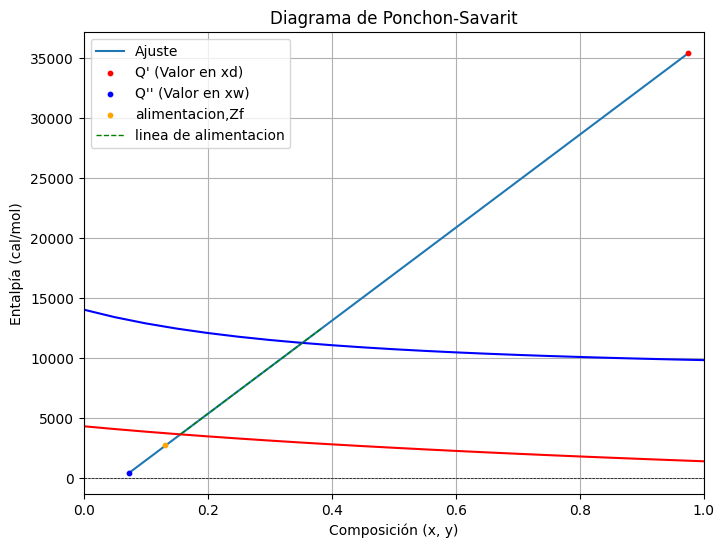

,Rmin Ponchon,Rmin McCabe
0,3.004734,2.624161


C:\Users\chris\AppData\Local\Temp\ipykernel_26572\2429918998.py:79: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  R_gililland_calc = fsolve(gililland, Rinit)


,Rmin,Rmin Ponchon,Rgililland
0,[2.6241613683317766],3.004734,1.363362e+07


El R de gililland, esta mal ya que se calcula con N de fenske y ese seria el numero minimo de etapas


,Fase,Densidad kg/m³,Caudal mol/h,Temperatura (°C)
0,Destilado,766.729469,2.876863,61.9
1,Residuo,727.699412,26.114738,85.8
2,Alimentacion,743.042904,30.078781,72.7


comprobacion de caudales Destilado + residuo 28.991601277989947
se estan añadiendo  1.087 mol/h de alimentacion
es decir  0.030 g/h de alimentacion 4.097e-05 L/h de alimentacion
La capacidad calorifica del condensador es: 150.0 kcal/h


,destilado (kcal/h),residuo (kcal/h),Refrigeracion (kcal/h),Alimentacion (kcal/h),Calor total (kcal/h)
0,28.592,103.959,150.000,82.768,199.788


In [323]:
from IPython.display import HTML
# punto pinch linea alimentacion
hqalim_x, hqalim_y = ylose, polinomio_hv(ylose)
hqaliminf_x, hqaliminf_y = xlose, polinomio_hl(xlose)
print('Punto de pinch en la linea de alimentacion:', hqalim_x, hqalim_y)
hqx = [hqalim_x, hqaliminf_x]
hqy = [hqalim_y, hqaliminf_y]
coeffs = np.polyfit(hqx, hqy, 1)
polynomial = np.poly1d(coeffs)
#valores en xd, xw
value_at_xd = polynomial(xD)
value_at_xw = polynomial(xW)
# linspace para el grafico
x_fit = np.linspace(xW, xD, 100)
y_fit = polynomial(x_fit)




plt.figure(figsize=(8, 6))
plt.plot(x_fit, y_fit, '-', label='Ajuste')
plt.scatter(xD, value_at_xd, color='red', label='Q\' (Valor en xd)', s=10,zorder=5)
plt.scatter(xW, value_at_xw, color='blue', label='Q\'\' (Valor en xw)', s=10, zorder=5)
plt.scatter(xF, Hf, color='orange', label='alimentacion,Zf', s=10, zorder=5)
plt.plot(x1, hl, label='', color='red')
plt.plot(x1, hv, color='blue')
plt.plot([hqalim_x, hqaliminf_x], [hqalim_y, hqaliminf_y], color='green', linestyle='--', linewidth=1, label='linea de alimentacion')
plt.title('Diagrama de Ponchon-Savarit')
plt.xlabel('Composición (x, y)')
plt.ylabel('Entalpía (cal/mol)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid(True)
plt.legend()
plt.xlim(0, 1)
plt.show()
h0liq = polinomio_hl(xD)
h0vap = polinomio_hv(xD)
Rminponchon =(value_at_xd-h0vap)/(h0vap-h0liq) # R = (Q'y -Hv)/(Hv-Hl)
Rmindf = pd.DataFrame({
    'Rmin Ponchon': [Rminponchon],
    'Rmin McCabe': [Rmin[0]]
})
display(Rmindf)
densidad_prop_D = 767.09 #kg/m^3
densidad_met_D = 752.54 #kg/m^3
densidad_prop_R = 743.872 #kg/m^3
densidad_met_R = 726.434 #kg/m^3
densidad_prop_F = 756.777 #kg/m^3
densidad_met_F = 740.973 #kg/m^3
densidad_destilado = densidad_prop_D*xD + densidad_met_D*(1-xD)  
densidad_residuo = densidad_prop_R*xW + densidad_met_R*(1-xW) 
densidad_alimentacion = densidad_prop_F*xF + densidad_met_F*(1-xF)
QD_m3_h = QD * 1e-6 * 3600 #m^3/h
QB_m3_h = QB * 1e-6 * 3600 #m^3/h
QF_m3_h = QF * 1e-6 * 3600 #m^3/h
PMprop = 60.09 #g/mol
PMmet = 32.04 #g/mol
QDmol_h = QD_m3_h*densidad_destilado*1000/(PMprop*xD + PMmet*(1-xD))
QBmol_h = QB_m3_h*densidad_residuo*1000/(PMprop*xW + PMmet*(1-xW))
QFmol_h = QF_m3_h*densidad_alimentacion*1000/(PMprop*xF + PMmet*(1-xF))
tabla_caudales = {
    'Fase' : ['Destilado', 'Residuo', 'Alimentacion'],
    'Densidad kg/m³' : [densidad_destilado, densidad_residuo, densidad_alimentacion],
    'Caudal mol/h' : [QDmol_h, QBmol_h, QFmol_h],
    'Temperatura (°C)': [Tabla['TI12'][-1], Tabla['TI2'][-1], Tabla['TI13'][-1]]
}
#calculo de secciones correlacion de kirkbride  
Relacion_secciones = (((1-xF)/(xF))*((xW/(1-xD))**2)*(QBmol_h/QDmol_h))**0.206
# correlacion de gililland
#etapas fenske   vale no se puede por que la ecuacion de fenske daba el numero minimo de etapas 
N = (np.log10((xD / xW) * ((1 - xW) / (1 - xD)))) / (np.log10(alpha_media))
N_min = Nt_etapas
# (N-NMIN/ N+1) = 0.75*[1-[(R-RMIN)/(R+1)]**0.5688]
def gililland(R_gilliland):
    return (N - N_min) / (N + 1) - 0.75 * (1 - ((R_gilliland - Rmin) / (R_gilliland + 1))**0.5688)

Rinit = 1.4*Rmin  
R_gililland_calc = fsolve(gililland, Rinit)

R_tabla = {
    'Rmin': [Rmin],
    'Rmin Ponchon': [Rminponchon],
    'Rgililland': [R_gililland_calc[0]]
    
}
display(pd.DataFrame(R_tabla))
print('El R de gililland, esta mal ya que se calcula con N de fenske y ese seria el numero minimo de etapas')

display(HTML(f"""
<p style='font-weight: bold; font-size: 20px;'>Relación de secciones por la correlación de Kirkbride:
              {Relacion_secciones}</p>
"""))
display(pd.DataFrame(tabla_caudales))
print('comprobacion de caudales Destilado + residuo', QDmol_h+QBmol_h)
print('se estan añadiendo ', f'{QFmol_h-(QDmol_h+QBmol_h):.3f}', 'mol/h de alimentacion')
print('es decir ', f'{(QFmol_h-(QDmol_h+QBmol_h))/(PMprop*xF + PMmet*(1-xF)):.3f}', 'g/h de alimentacion',
    f'{(QFmol_h-(QDmol_h+QBmol_h))/(PMprop*xF + PMmet*(1-xF))/densidad_alimentacion:.3e}', 'L/h de alimentacion')

#QC capacidad calorifica del condensador
QC = 300 * 1 * ( Tabla['TI11'][-1]-Tabla['TI10'][-1] ) # 1kcal/h°C diferencia entrada-salida del refrigerante
HD = polinomio_hv(xD)
HB = polinomio_hl(xW)
print('La capacidad calorifica del condensador es:', QC, 'kcal/h')
QR = QDmol_h*HD + QBmol_h*HB + QC*1000 + R - QFmol_h*Hf# suponiendo que no hay perdida de calor en el medio que es falso
tabla_entalpias_caudales = {
    'destilado (kcal/h)': [f"{(QDmol_h * HD) / 1000:.3f}"],
    'residuo (kcal/h)': [f"{(QBmol_h * HB) / 1000:.3f}"],
    'Refrigeracion (kcal/h)': [f"{(QC * 1000) / 1000:.3f}"],
    'Alimentacion (kcal/h)': [f"{(QFmol_h * Hf) / 1000:.3f}"],
    'Calor total (kcal/h)': [f"{QR / 1000:.3f}"]
}
display(pd.DataFrame(tabla_entalpias_caudales))

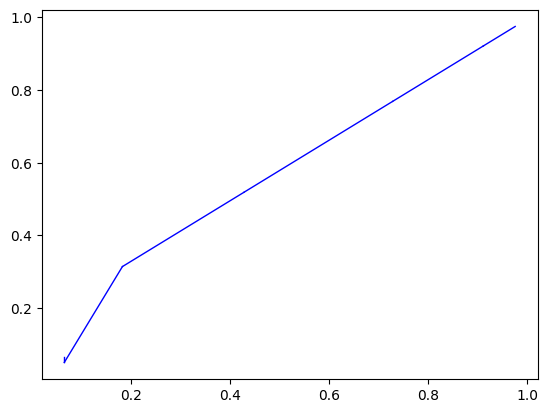

In [324]:
xlost = xlost_test[0]
ylost = ylost[0]

s = np.zeros((200, 2))
s[0, 0] = xD  # Iniciar en la composición del destilado
s[0, 1] = xD  # Empezar moviéndose horizontalmente hacia la curva de equilibrio

for i in range(1, 200):
    # Movimiento vertical hacia abajo: y = x (operación a reflujo total)
    s[i, 1] = s[i-1, 0]
    
    if s[i, 1] <= xW:  # Si llegamos a la composición del residuo, detenemos
        s[i, 0] = s[i, 1]  # En la última etapa, y = x = xW
        break
    
    # Movimiento horizontal hacia la curva de equilibrio
    s[i, 0] = np.interp(s[i, 1], y1, x1)  # Interpolar sobre la curva de equilibrio

    # Comprobar si estamos en la sección de enriquecimiento o agotamiento
    if s[i, 1] >= yint:
        # Sección de enriquecimiento
        s[i, 1] = R/(R+1)*s[i,0] + xD/(R+1) # Línea de operación de enriquecimiento
    else:
        # Sección de agotamiento
        s[i, 1] = ((yint-xW)/(xint-xW))*(s[i,0]-xW) + xW  # Línea de operación de agotamiento

# Limpiar filas con ceros innecesarios
s = s[~np.all(s == 0, axis=1)]
s_rows = s.shape[0]

# Graficar las etapas
for i in range(s_rows - 1):
    plt.plot([s[i, 0], s[i+1, 0]], [s[i, 1], s[i+1, 1]], 'b', lw=1)  # Dibujar líneas horizontales y verticales